In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, silhouette_score, silhouette_samples
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import preprocessing
import autograd.numpy as np
from autograd import grad
from sklearn import datasets
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from sklearn.calibration import CalibratedClassifierCV
BLUE, ORANGE, GRAY = '#57B5E8', '#E69E00', '#646369'
import torch
from torch import nn, optim
import math
from IPython import display
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from matplotlib import cm
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

In [62]:
import random
random.seed(12065826)

# Data Cleaning

In [63]:
df = pd.read_csv('musicData.csv')

In [64]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [65]:
df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [66]:
df = df.dropna()
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [67]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [68]:
df = df.drop('instance_id', axis=1)

In [69]:
df = df.drop('artist_name', axis=1)

In [70]:
df = df.drop('track_name', axis=1)

In [71]:
df['popularity'].value_counts()

52.0    1316
54.0    1295
53.0    1286
50.0    1265
55.0    1250
        ... 
95.0       2
97.0       1
99.0       1
94.0       1
92.0       1
Name: popularity, Length: 99, dtype: int64

In [72]:
df['acousticness'].value_counts()

0.995000    278
0.994000    240
0.992000    215
0.993000    198
0.990000    158
           ... 
0.000036      1
0.000356      1
0.000074      1
0.000027      1
0.000298      1
Name: acousticness, Length: 4193, dtype: int64

In [73]:
df['danceability'].value_counts()

0.5290    143
0.6570    139
0.6100    134
0.5540    133
0.4990    130
         ... 
0.0996      1
0.0846      1
0.0737      1
0.0817      1
0.0954      1
Name: danceability, Length: 1088, dtype: int64

In [74]:
df['energy'].value_counts()

0.80500    103
0.67500    103
0.72000     99
0.85900     98
0.83000     96
          ... 
0.00664      1
0.06840      1
0.00945      1
0.00740      1
0.07760      1
Name: energy, Length: 2085, dtype: int64

In [75]:
df['instrumentalness'].value_counts()

0.000000    15001
0.898000       70
0.902000       69
0.897000       66
0.912000       66
            ...  
0.000049        1
0.000876        1
0.000094        1
0.000787        1
0.000926        1
Name: instrumentalness, Length: 5131, dtype: int64

In [76]:
df['key'].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

In [77]:
df.loc[df['key'] == 'G#', 'key'] = -4
df.loc[df['key'] == 'D#', 'key'] = -3
df.loc[df['key'] == 'A#', 'key'] = -2
df.loc[df['key'] == 'F', 'key'] = -1
df.loc[df['key'] == 'C', 'key'] = 0
df.loc[df['key'] == 'G', 'key'] = 1
df.loc[df['key'] == 'D', 'key'] = 2
df.loc[df['key'] == 'A', 'key'] = 3
df.loc[df['key'] == 'E', 'key'] = 4
df.loc[df['key'] == 'B', 'key'] = 5
df.loc[df['key'] == 'F#', 'key'] = 6
df.loc[df['key'] == 'C#', 'key'] = 7
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,-2,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,2,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,-4,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,7,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,6,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,7,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,5,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,2,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,1,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [78]:
df['liveness'].value_counts()

0.1100    625
0.1080    610
0.1110    609
0.1090    552
0.1070    542
         ... 
0.0273      1
0.8000      1
0.7610      1
0.0266      1
0.0196      1
Name: liveness, Length: 1646, dtype: int64

In [79]:
df['loudness'].value_counts()

-5.443     19
-7.066     17
-5.133     17
-5.982     16
-5.013     16
           ..
-0.670      1
-2.735      1
-2.372      1
-9.518      1
-13.652     1
Name: loudness, Length: 17247, dtype: int64

In [80]:
df['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [81]:
df = pd.get_dummies(df, columns=['mode'])
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,-2,0.115,-5.201,0.0748,100.889,4-Apr,0.759,Electronic,0,1
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,2,0.124,-7.043,0.0300,115.00200000000001,4-Apr,0.531,Electronic,0,1
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,-4,0.534,-4.617,0.0345,127.994,4-Apr,0.333,Electronic,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,7,0.157,-4.498,0.2390,128.014,4-Apr,0.270,Electronic,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,6,0.157,-6.266,0.0413,145.036,4-Apr,0.323,Electronic,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,7,0.119,-7.022,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop,1,0
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,5,0.109,-9.814,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop,1,0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,2,0.143,-5.443,0.1460,131.079,4-Apr,0.395,Hip-Hop,1,0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,1,0.106,-5.016,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop,0,1


In [82]:
df['speechiness'].value_counts()

0.0332    173
0.0337    155
0.0315    153
0.0329    152
0.0362    148
         ... 
0.7950      1
0.7080      1
0.6830      1
0.8590      1
0.8550      1
Name: speechiness, Length: 1337, dtype: int64

In [83]:
df['obtained_date'].value_counts()

4-Apr    44748
3-Apr     4067
5-Apr      784
1-Apr      400
0/4          1
Name: obtained_date, dtype: int64

In [84]:
df = df.drop('obtained_date', axis=1)
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,-2,0.115,-5.201,0.0748,100.889,0.759,Electronic,0,1
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,2,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,0,1
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,-4,0.534,-4.617,0.0345,127.994,0.333,Electronic,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,7,0.157,-4.498,0.2390,128.014,0.270,Electronic,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,6,0.157,-6.266,0.0413,145.036,0.323,Electronic,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,7,0.119,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop,1,0
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,5,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop,1,0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,2,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop,1,0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,1,0.106,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop,0,1


In [85]:
df['duration_ms'].value_counts()

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: duration_ms, Length: 26028, dtype: int64

In [86]:
df['tempo'].value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64

In [87]:
df['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [88]:
df['music_genre'] = pd.Categorical(df['music_genre'])
df['music_genre'] = df['music_genre'].cat.codes
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,-2,0.115,-5.201,0.0748,100.889,0.759,5,0,1
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,2,0.124,-7.043,0.0300,115.00200000000001,0.531,5,0,1
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,-4,0.534,-4.617,0.0345,127.994,0.333,5,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,7,0.157,-4.498,0.2390,128.014,0.270,5,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,6,0.157,-6.266,0.0413,145.036,0.323,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,7,0.119,-7.022,0.2980,98.02799999999999,0.330,6,1,0
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,5,0.109,-9.814,0.0550,122.04299999999999,0.113,6,1,0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,2,0.143,-5.443,0.1460,131.079,0.395,6,1,0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,1,0.106,-5.016,0.0441,75.88600000000001,0.354,6,0,1


In [89]:
df['music_genre'].value_counts()

5    5000
1    5000
7    5000
0    5000
4    5000
8    5000
2    5000
9    5000
3    5000
6    5000
Name: music_genre, dtype: int64

In [90]:
alternative = df[df['music_genre'] == 0]
anime = df[df['music_genre'] == 1]
blues = df[df['music_genre'] == 2]
classical = df[df['music_genre'] == 3]
country = df[df['music_genre'] == 4]
electronic = df[df['music_genre'] == 5]
hiphop = df[df['music_genre'] == 6]
jazz = df[df['music_genre'] == 7]
rap = df[df['music_genre'] == 8]
rock = df[df['music_genre'] == 9]

In [91]:
train_alternative, test_alternative = train_test_split(alternative, test_size=0.10, random_state=0)
train_anime, test_anime = train_test_split(anime, test_size=0.10, random_state=0)
train_blues, test_blues = train_test_split(blues, test_size=0.10, random_state=0)
train_classical, test_classical = train_test_split(classical, test_size=0.10, random_state=0)
train_country, test_country = train_test_split(country, test_size=0.10, random_state=0)
train_electronic, test_electronic = train_test_split(electronic, test_size=0.10, random_state=0)
train_hiphop, test_hiphop = train_test_split(hiphop, test_size=0.10, random_state=0)
train_jazz, test_jazz = train_test_split(jazz, test_size=0.10, random_state=0)
train_rap, test_rap = train_test_split(rap, test_size=0.10, random_state=0)
train_rock, test_rock = train_test_split(rock, test_size=0.10, random_state=0)

In [92]:
train = pd.concat([train_alternative, train_anime, train_blues, train_classical, train_country, train_electronic, train_hiphop, train_jazz, train_rap, train_rock])
train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
18876,48.0,0.127000,0.781,149773.0,0.366,0.000787,7,0.1020,-9.067,0.2700,125.07,0.321,0,0,1
19304,41.0,0.096700,0.766,162320.0,0.428,0.023700,6,0.1000,-8.653,0.0485,91.01299999999999,0.565,0,0,1
19724,54.0,0.000128,0.619,-1.0,0.916,0.183000,0,0.1210,-4.214,0.0459,98.008,0.743,0,1,0
18200,72.0,0.002100,0.774,197987.0,0.750,0.000018,5,0.0808,-4.927,0.0413,118.015,0.925,0,0,1
16927,46.0,0.041600,0.506,298333.0,0.721,0.000000,3,0.0993,-5.974,0.0330,79.999,0.397,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,57.0,0.087300,0.542,203120.0,0.859,0.000000,2,0.1450,-5.137,0.0424,140.9,0.637,9,1,0
38269,66.0,0.045200,0.264,-1.0,0.780,0.022200,0,0.3760,-2.741,0.0517,155.376,0.456,9,1,0
36658,74.0,0.005520,0.496,262333.0,0.682,0.000029,-4,0.0589,-4.095,0.0294,?,0.474,9,1,0
37612,57.0,0.000104,0.364,189200.0,0.912,0.002500,1,0.0860,-2.968,0.1070,105.368,0.666,9,1,0


In [93]:
df_duration_ms_train = train[train['duration_ms'] > 0]
duration_ms_median = df_duration_ms_train['duration_ms'].median()
duration_ms_median

227406.5

In [94]:
train.loc[train['duration_ms'] <= 0, 'duration_ms'] = duration_ms_median
train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
18876,48.0,0.127000,0.781,149773.0,0.366,0.000787,7,0.1020,-9.067,0.2700,125.07,0.321,0,0,1
19304,41.0,0.096700,0.766,162320.0,0.428,0.023700,6,0.1000,-8.653,0.0485,91.01299999999999,0.565,0,0,1
19724,54.0,0.000128,0.619,227406.5,0.916,0.183000,0,0.1210,-4.214,0.0459,98.008,0.743,0,1,0
18200,72.0,0.002100,0.774,197987.0,0.750,0.000018,5,0.0808,-4.927,0.0413,118.015,0.925,0,0,1
16927,46.0,0.041600,0.506,298333.0,0.721,0.000000,3,0.0993,-5.974,0.0330,79.999,0.397,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,57.0,0.087300,0.542,203120.0,0.859,0.000000,2,0.1450,-5.137,0.0424,140.9,0.637,9,1,0
38269,66.0,0.045200,0.264,227406.5,0.780,0.022200,0,0.3760,-2.741,0.0517,155.376,0.456,9,1,0
36658,74.0,0.005520,0.496,262333.0,0.682,0.000029,-4,0.0589,-4.095,0.0294,?,0.474,9,1,0
37612,57.0,0.000104,0.364,189200.0,0.912,0.002500,1,0.0860,-2.968,0.1070,105.368,0.666,9,1,0


In [95]:
df_tempo_train = train[train['tempo'] != '?']
tempo_median = df_tempo_train['tempo'].median()
tempo_median

119.90100000000001

In [96]:
train.loc[train['tempo'] == '?', 'tempo'] = tempo_median
train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
18876,48.0,0.127000,0.781,149773.0,0.366,0.000787,7,0.1020,-9.067,0.2700,125.07,0.321,0,0,1
19304,41.0,0.096700,0.766,162320.0,0.428,0.023700,6,0.1000,-8.653,0.0485,91.01299999999999,0.565,0,0,1
19724,54.0,0.000128,0.619,227406.5,0.916,0.183000,0,0.1210,-4.214,0.0459,98.008,0.743,0,1,0
18200,72.0,0.002100,0.774,197987.0,0.750,0.000018,5,0.0808,-4.927,0.0413,118.015,0.925,0,0,1
16927,46.0,0.041600,0.506,298333.0,0.721,0.000000,3,0.0993,-5.974,0.0330,79.999,0.397,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,57.0,0.087300,0.542,203120.0,0.859,0.000000,2,0.1450,-5.137,0.0424,140.9,0.637,9,1,0
38269,66.0,0.045200,0.264,227406.5,0.780,0.022200,0,0.3760,-2.741,0.0517,155.376,0.456,9,1,0
36658,74.0,0.005520,0.496,262333.0,0.682,0.000029,-4,0.0589,-4.095,0.0294,119.901,0.474,9,1,0
37612,57.0,0.000104,0.364,189200.0,0.912,0.002500,1,0.0860,-2.968,0.1070,105.368,0.666,9,1,0


In [97]:
test = pd.concat([test_alternative, test_anime, test_blues, test_classical, test_country, test_electronic, test_hiphop, test_jazz, test_rap, test_rock])
test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
15403,58.0,0.69200,0.314,252867.0,0.399,0.004190,-1,0.1100,-9.199,0.0501,169.525,0.302,0,1,0
18838,63.0,0.00417,0.504,238733.0,0.960,0.569000,0,0.0613,-1.464,0.1830,96.682,0.774,0,1,0
19841,60.0,0.24200,0.755,200213.0,0.898,0.000145,5,0.1440,-2.051,0.0323,119.756,0.966,0,0,1
19577,50.0,0.08340,0.574,221362.0,0.894,0.000000,1,0.0778,-4.011,0.0629,89.979,0.458,0,0,1
15641,45.0,0.08280,0.699,213626.0,0.702,0.001470,6,0.0667,-7.955,0.0642,75.012,0.608,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36933,55.0,0.06820,0.382,233977.0,0.743,0.000000,7,0.0901,-5.093,0.0548,205.66,0.469,9,1,0
39371,54.0,0.33300,0.752,-1.0,0.566,0.130000,3,0.1080,-9.640,0.0324,115.794,0.727,9,1,0
38555,52.0,0.00614,0.515,260160.0,0.912,0.177000,4,0.1570,-8.547,0.0693,107.131,0.596,9,1,0
37194,56.0,0.10700,0.598,138173.0,0.841,0.000082,-1,0.1540,-6.652,0.0563,116.07700000000001,0.367,9,0,1


In [98]:
test.loc[test['tempo'] == '?', 'tempo'] = tempo_median
test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
15403,58.0,0.69200,0.314,252867.0,0.399,0.004190,-1,0.1100,-9.199,0.0501,169.525,0.302,0,1,0
18838,63.0,0.00417,0.504,238733.0,0.960,0.569000,0,0.0613,-1.464,0.1830,96.682,0.774,0,1,0
19841,60.0,0.24200,0.755,200213.0,0.898,0.000145,5,0.1440,-2.051,0.0323,119.756,0.966,0,0,1
19577,50.0,0.08340,0.574,221362.0,0.894,0.000000,1,0.0778,-4.011,0.0629,89.979,0.458,0,0,1
15641,45.0,0.08280,0.699,213626.0,0.702,0.001470,6,0.0667,-7.955,0.0642,75.012,0.608,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36933,55.0,0.06820,0.382,233977.0,0.743,0.000000,7,0.0901,-5.093,0.0548,205.66,0.469,9,1,0
39371,54.0,0.33300,0.752,-1.0,0.566,0.130000,3,0.1080,-9.640,0.0324,115.794,0.727,9,1,0
38555,52.0,0.00614,0.515,260160.0,0.912,0.177000,4,0.1570,-8.547,0.0693,107.131,0.596,9,1,0
37194,56.0,0.10700,0.598,138173.0,0.841,0.000082,-1,0.1540,-6.652,0.0563,116.07700000000001,0.367,9,0,1


In [99]:
test.loc[test['duration_ms'] <= 0, 'duration_ms'] = duration_ms_median
test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
15403,58.0,0.69200,0.314,252867.0,0.399,0.004190,-1,0.1100,-9.199,0.0501,169.525,0.302,0,1,0
18838,63.0,0.00417,0.504,238733.0,0.960,0.569000,0,0.0613,-1.464,0.1830,96.682,0.774,0,1,0
19841,60.0,0.24200,0.755,200213.0,0.898,0.000145,5,0.1440,-2.051,0.0323,119.756,0.966,0,0,1
19577,50.0,0.08340,0.574,221362.0,0.894,0.000000,1,0.0778,-4.011,0.0629,89.979,0.458,0,0,1
15641,45.0,0.08280,0.699,213626.0,0.702,0.001470,6,0.0667,-7.955,0.0642,75.012,0.608,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36933,55.0,0.06820,0.382,233977.0,0.743,0.000000,7,0.0901,-5.093,0.0548,205.66,0.469,9,1,0
39371,54.0,0.33300,0.752,227406.5,0.566,0.130000,3,0.1080,-9.640,0.0324,115.794,0.727,9,1,0
38555,52.0,0.00614,0.515,260160.0,0.912,0.177000,4,0.1570,-8.547,0.0693,107.131,0.596,9,1,0
37194,56.0,0.10700,0.598,138173.0,0.841,0.000082,-1,0.1540,-6.652,0.0563,116.07700000000001,0.367,9,0,1


In [100]:
y_train = train['music_genre']
y_test = test['music_genre']
X_train = train.drop('music_genre', axis=1)
X_test = test.drop('music_genre', axis=1)

In [101]:
sc = StandardScaler()

In [102]:
X_train['popularity'] = sc.fit_transform(np.array(X_train['popularity']).reshape(-1,1))
X_test['popularity'] = sc.fit_transform(np.array(X_test['popularity']).reshape(-1,1))

In [103]:
X_train['acousticness'] = sc.fit_transform(np.array(X_train['acousticness']).reshape(-1,1))
X_test['acousticness'] = sc.fit_transform(np.array(X_test['acousticness']).reshape(-1,1))

In [104]:
X_train['danceability'] = sc.fit_transform(np.array(X_train['danceability']).reshape(-1,1))
X_test['danceability'] = sc.fit_transform(np.array(X_test['danceability']).reshape(-1,1))

In [105]:
X_train['duration_ms'] = sc.fit_transform(np.array(X_train['duration_ms']).reshape(-1,1))
X_test['duration_ms'] = sc.fit_transform(np.array(X_test['duration_ms']).reshape(-1,1))

In [106]:
X_train['energy'] = sc.fit_transform(np.array(X_train['energy']).reshape(-1,1))
X_test['energy'] = sc.fit_transform(np.array(X_test['energy']).reshape(-1,1))

In [107]:
X_train['instrumentalness'] = sc.fit_transform(np.array(X_train['instrumentalness']).reshape(-1,1))
X_test['instrumentalness'] = sc.fit_transform(np.array(X_test['instrumentalness']).reshape(-1,1))

In [108]:
X_train['liveness'] = sc.fit_transform(np.array(X_train['liveness']).reshape(-1,1))
X_test['liveness'] = sc.fit_transform(np.array(X_test['liveness']).reshape(-1,1))

In [109]:
X_train['loudness'] = sc.fit_transform(np.array(X_train['loudness']).reshape(-1,1))
X_test['loudness'] = sc.fit_transform(np.array(X_test['loudness']).reshape(-1,1))

In [110]:
X_train['speechiness'] = sc.fit_transform(np.array(X_train['speechiness']).reshape(-1,1))
X_test['speechiness'] = sc.fit_transform(np.array(X_test['speechiness']).reshape(-1,1))

In [111]:
X_train['tempo'] = sc.fit_transform(np.array(X_train['tempo']).reshape(-1,1))
X_test['tempo'] = sc.fit_transform(np.array(X_test['tempo']).reshape(-1,1))

In [112]:
X_train['valence'] = sc.fit_transform(np.array(X_train['valence']).reshape(-1,1))
X_test['valence'] = sc.fit_transform(np.array(X_test['valence']).reshape(-1,1))

# Dimensionality Reduction and Clustering

## Principal Component Analysis

In [113]:
pca_1 = PCA(whiten=True)
X_train_pca = pca_1.fit_transform(X_train)
X_test_pca = pca_1.transform(X_test)

In [114]:
eig_vals = pca_1.explained_variance_
loadings = pca_1.components_
covar_explained = eig_vals/sum(eig_vals)*100

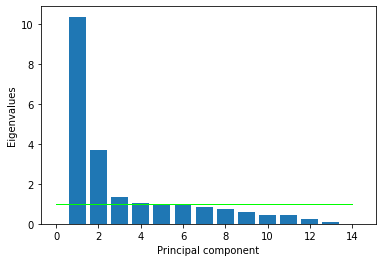

In [115]:
num_classes = 14
plt.bar(np.linspace(1, num_classes, num_classes),eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.plot([0,num_classes], [1,1], color='lime', linewidth=1) #Line for eigenvalue=1

In [116]:
pca_2 = PCA(n_components=4, whiten=True)
X_train_pca = pca_2.fit_transform(X_train)
X_test_pca = pca_2.transform(X_test)
pca_2.explained_variance_ratio_

array([0.47601321, 0.16858273, 0.0616436 , 0.04837013])

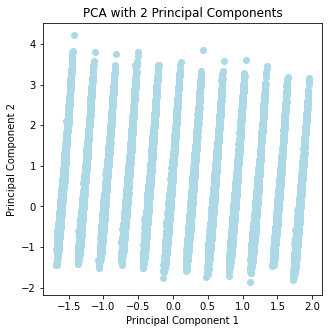

In [117]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c='lightblue')
plt.scatter(X_test_pca[:,0], X_test_pca[:, 1], c='lightblue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA with 2 Principal Components")
plt.show()

## t-SNE

In [118]:
full_df = np.concatenate((X_train_pca, X_test_pca), axis=0)
X_embedded = TSNE(n_components=2, perplexity=150)
X_embedded.fit(full_df)

TSNE(perplexity=150)

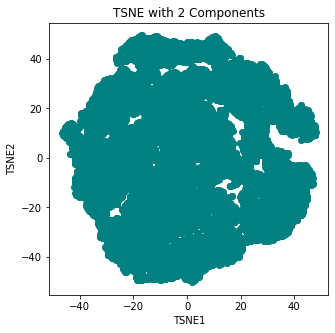

In [119]:
plt.figure(figsize=(5, 5))
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:, 1], c='teal')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title("TSNE with 2 Components")
plt.show()

In [120]:
varyperplex = [5,10,20,25,50,100,150]
kldiv = []
for i in varyperplex:
    tsne = TSNE(n_components=2, perplexity=i)
    tsne.fit(full_df)
    kldiv.append(tsne.kl_divergence_)

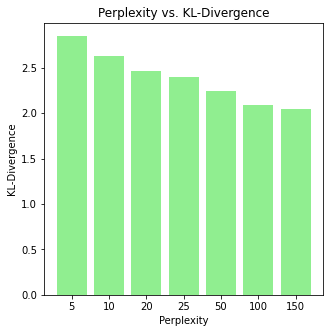

In [121]:
plt.figure(figsize=(5, 5))
for i in range(len(varyperplex)):
    varyperplex[i] = str(varyperplex[i])
plt.bar(varyperplex, kldiv, color='lightgreen')
plt.xlabel('Perplexity')
plt.ylabel('KL-Divergence')
plt.title("Perplexity vs. KL-Divergence")
plt.show()

## Clustering

For n_clusters = 2 the average silhouette_score is : 0.3633659
For n_clusters = 3 the average silhouette_score is : 0.38917735
For n_clusters = 4 the average silhouette_score is : 0.37999254
For n_clusters = 5 the average silhouette_score is : 0.37365174
For n_clusters = 6 the average silhouette_score is : 0.40001607
For n_clusters = 7 the average silhouette_score is : 0.38513547
For n_clusters = 8 the average silhouette_score is : 0.37683132
For n_clusters = 9 the average silhouette_score is : 0.3677478


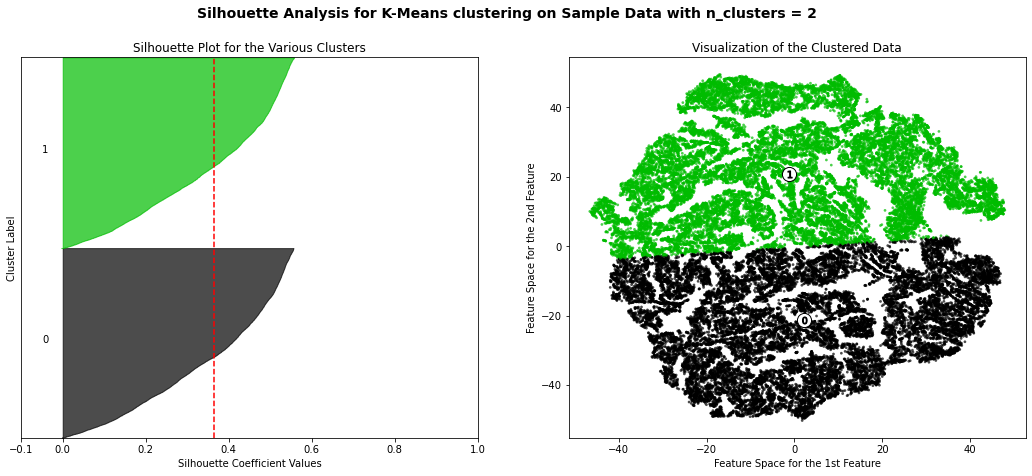

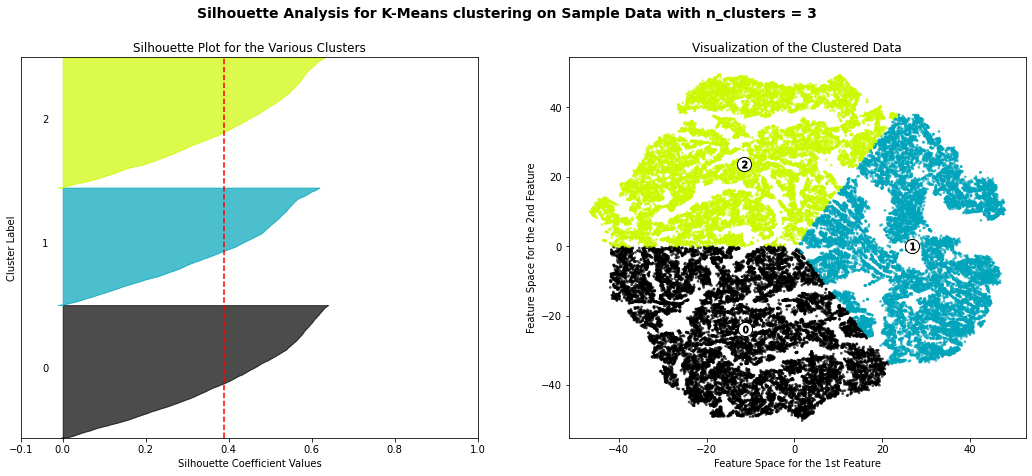

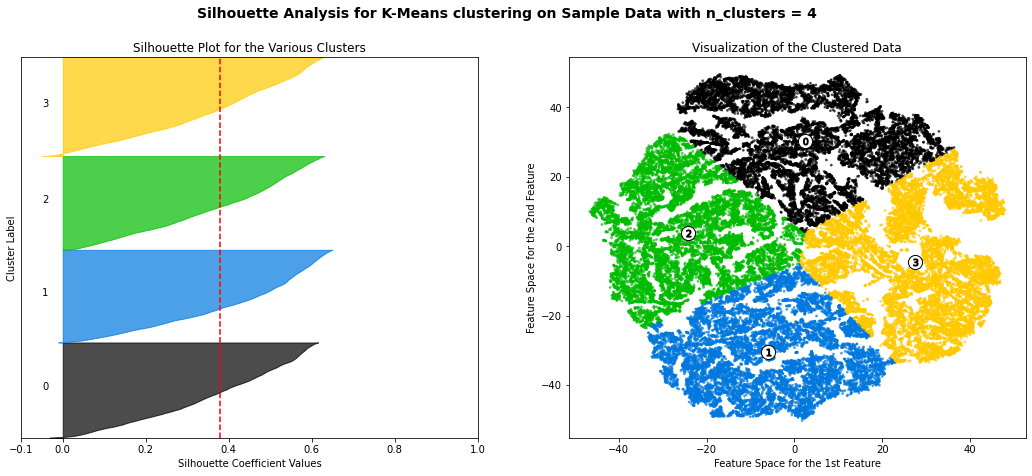

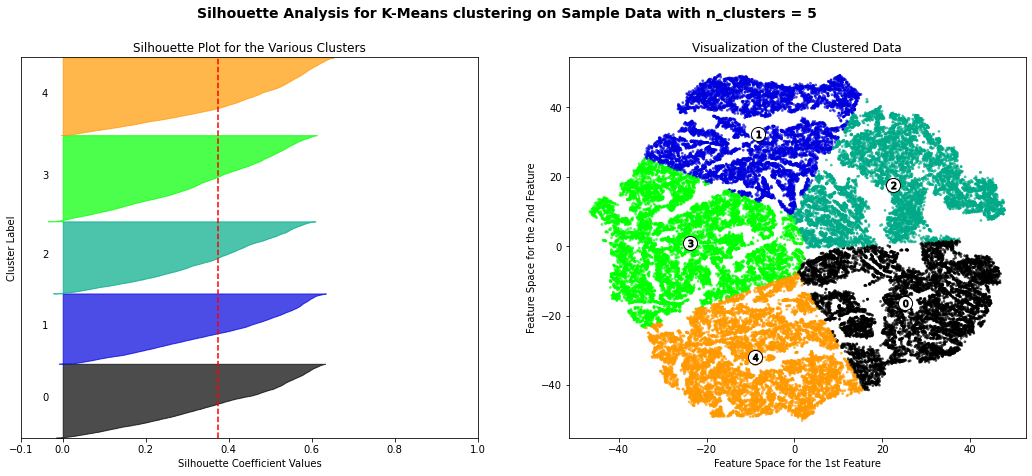

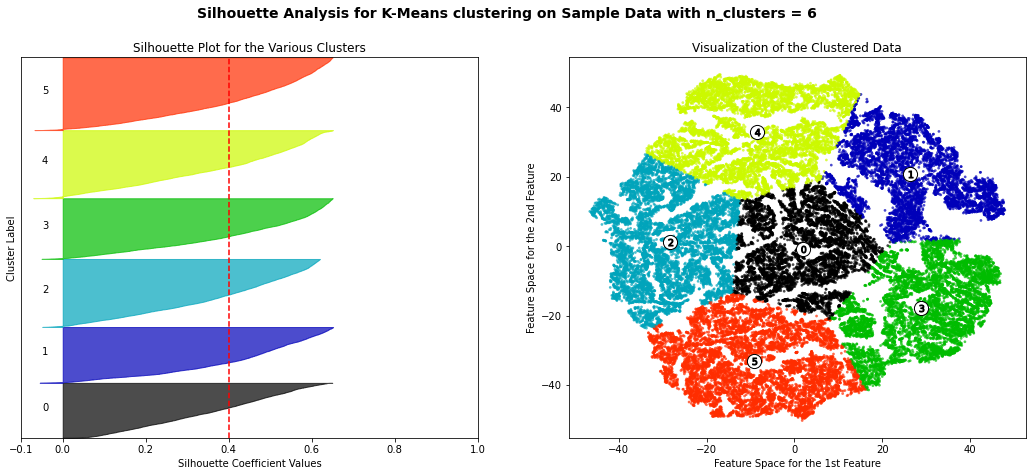

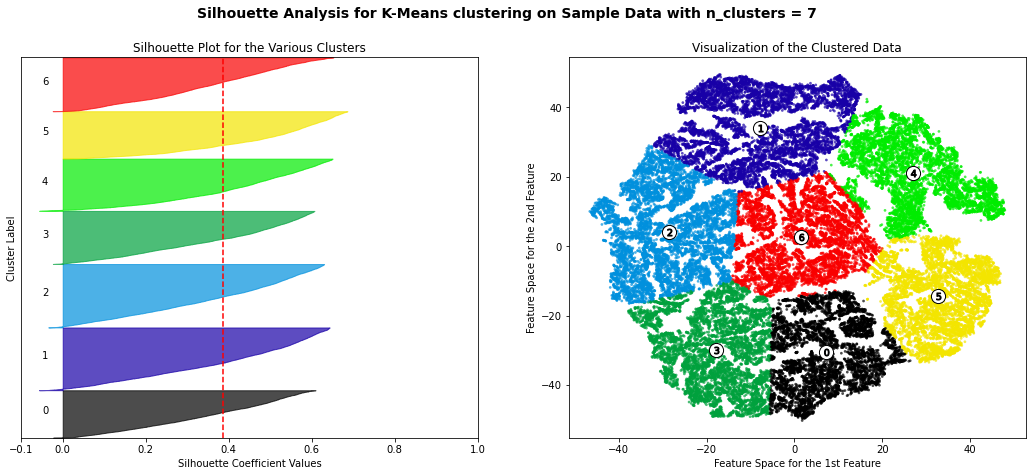

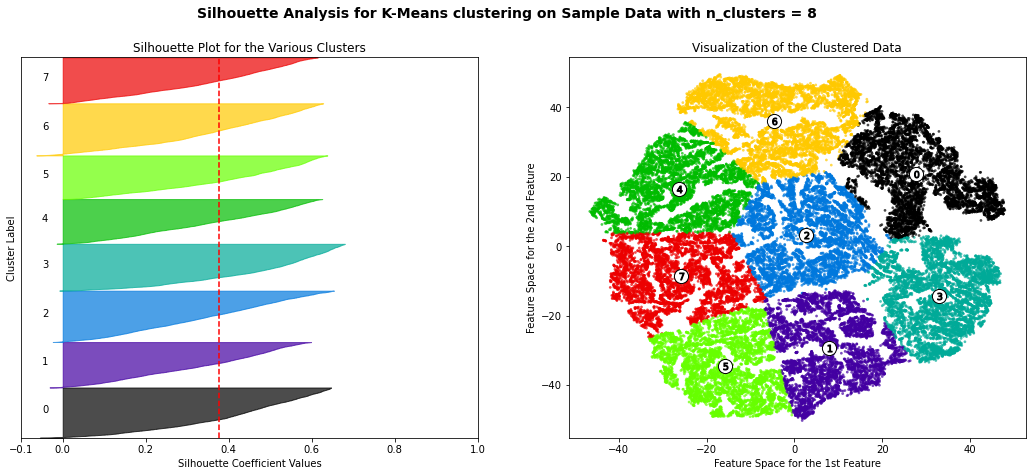

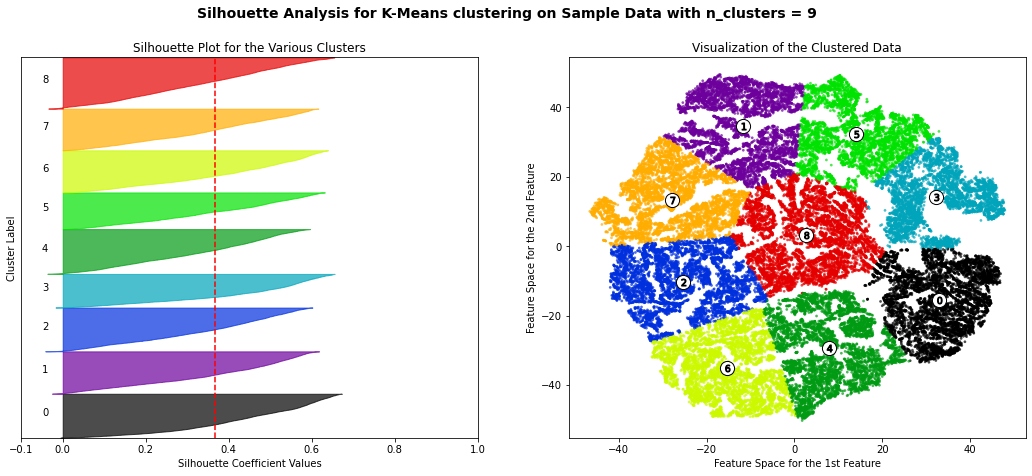

In [122]:
X = X_embedded.embedding_

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "the average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette Plot for the Various Clusters")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualization of the Clustered Data")
    ax2.set_xlabel("Feature Space for the 1st Feature")
    ax2.set_ylabel("Feature Space for the 2nd Feature")

    plt.suptitle(
        "Silhouette Analysis for K-Means clustering on Sample Data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 10 the average silhouette_score is : 0.3748851


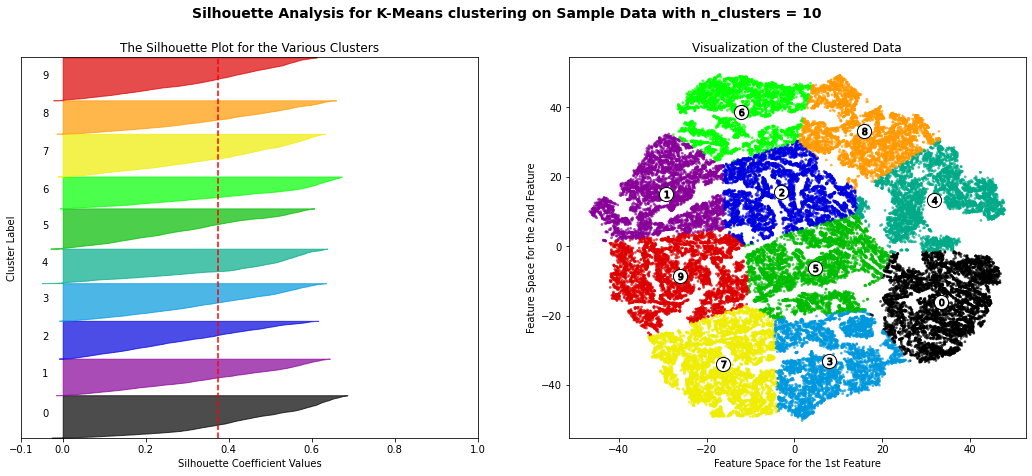

In [123]:
X = X_embedded.embedding_

range_n_clusters = [10]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "the average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The Silhouette Plot for the Various Clusters")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualization of the Clustered Data")
    ax2.set_xlabel("Feature Space for the 1st Feature")
    ax2.set_ylabel("Feature Space for the 2nd Feature")

    plt.suptitle(
        "Silhouette Analysis for K-Means clustering on Sample Data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [124]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train_pca)
X_train_cluster = kmeans.predict(X_train_pca)
X_test_cluster = kmeans.predict(X_test_pca)

In [125]:
X_train_final = np.concatenate((X_train_pca, X_train_cluster.reshape(-1, 1)), axis=1)
X_test_final = np.concatenate((X_test_pca, X_test_cluster.reshape(-1, 1)), axis=1)
X_train_final

array([[-1.62519621, -0.16009259, -1.5208052 ,  0.72730083,  6.        ],
       [-1.29918052, -0.05670378, -1.13218083, -0.8518991 ,  2.        ],
       [ 0.53473846, -0.92657272, -0.11198225, -0.95106427,  1.        ],
       ...,
       [ 1.7807487 , -0.89129652, -0.18408948, -0.52167732,  3.        ],
       [ 0.22448583, -0.87063189,  0.15326036, -0.56020545,  1.        ],
       [-1.00440388, -0.39855127, -0.03096525, -0.47613672,  2.        ]])

# Classification

In [133]:
def eval_class_roc_acc(probs, acc, classifier):

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):  # Assuming you have 10 classes
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], probs[:, i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_bin.ravel(), probs.ravel())

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i in range(10):  # Assuming you have 10 classes
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = classifier + ' Classifier With All Features'
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    print(classifier, 'Classifier Accuracy = {:0.3f}%'.format(100 * acc))
    print(classifier, 'Classifier Micro-average AUC = {:.5f}'.format(roc_auc["micro"]))

## Random Forest

In [127]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [130]:
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Best Score:  0.36273333333333335


In [131]:
rfc = RandomForestClassifier(**best_params, random_state=0)
rfc.fit(X_train_final, y_train)

rfc_pred = rfc.predict(X_test_final)

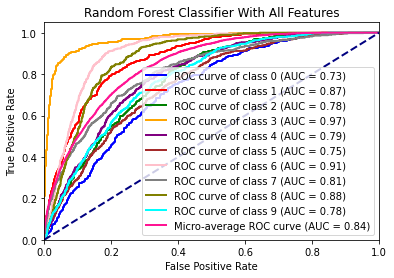

Random Forest Classifier Accuracy = 36.220%
Random Forest Classifier Micro-average AUC = 0.84427


In [134]:
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_probs = rfc.predict_proba(X_test_final)

eval_class_roc_acc(rfc_probs, rfc_acc, "Random Forest")

## Support Vector Machine

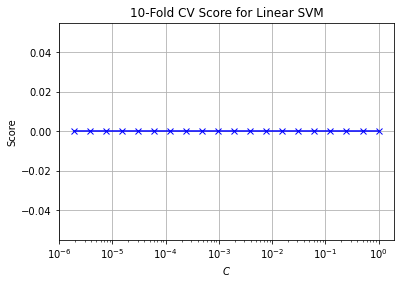

In [135]:
C = 1/(2**np.arange(0, 20)) # 1,...,1e-6

k = 10 # Kfold CV.
cv_scores = np.zeros(len(C))
split = model_selection.KFold(k)
for i in range(len(C)):
    svm = LinearSVC(C = C[i], dual = False)
    cv_scores[i] = np.mean(model_selection.cross_val_score(svm, X_train_final, y_train, cv = split))

plt.figure(2)
plt.semilogx(C, cv_scores, 'b-x')
plt.xlabel(r'$C$')
plt.ylabel(r'Score')
plt.title(r'{:d}-Fold CV Score for Linear SVM'.format(k))
plt.grid();

In [136]:
max_i = np.argmax(cv_scores)
C = C[max_i]
C

1.0

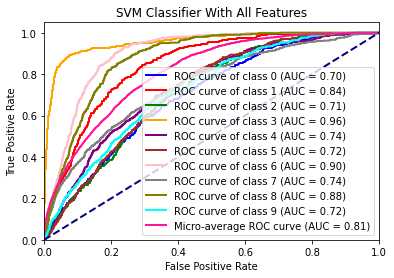

SVM Classifier Accuracy = 34.040%
SVM Classifier Micro-average AUC = 0.81071


In [137]:
# Create the base classifier
svm = LinearSVC(C=C, dual=False)

# Wrap the classifier with CalibratedClassifierCV
clf = CalibratedClassifierCV(svm)
clf.fit(X_train_final, y_train)

svm_pred = clf.predict(X_test_final)

svm_acc = accuracy_score(y_test, svm_pred)
svm_probs = clf.predict_proba(X_test_final)

eval_class_roc_acc(svm_probs, svm_acc, "SVM")

## AdaBoost

In [138]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'base_estimator__max_depth': [2, 4, 6],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_estimator = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=base_estimator, random_state=0)

grid_search = GridSearchCV(abc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [2, 4, 6],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [139]:
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'algorithm': 'SAMME', 'base_estimator__max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 200}
Best Score:  0.3610888888888889


In [142]:
best_max_depth = best_params['base_estimator__max_depth']
best_base_estimator = DecisionTreeClassifier(max_depth=best_max_depth)
del best_params['base_estimator__max_depth']
abc = AdaBoostClassifier(base_estimator=best_base_estimator, random_state=0, **best_params)
abc.fit(X_train_final, y_train)

abc_pred = abc.predict(X_test_final)

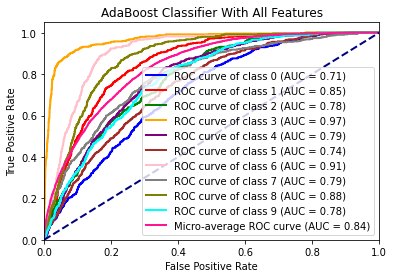

AdaBoost Classifier Accuracy = 36.620%
AdaBoost Classifier Micro-average AUC = 0.83753


In [143]:
abc_acc = accuracy_score(y_test, abc_pred)
abc_probs = abc.predict_proba(X_test_final)

eval_class_roc_acc(abc_probs, abc_acc, "AdaBoost")

## Feedforward Neural Network

In [144]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': [None, 'relu', 'tanh', 'logistic', 'identity'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

mlpc = MLPClassifier()

grid_search = GridSearchCV(mlpc, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': [None, 'relu', 'tanh', 'logistic',
                                        'identity'],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10),
                                                (50, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [145]:
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001}
Best Score:  0.37062222222222224


In [146]:
mlpc = MLPClassifier(**best_params, random_state=0)  
mlpc.fit(X_train_final, y_train)

mlpc_pred = abc.predict(X_test_final)

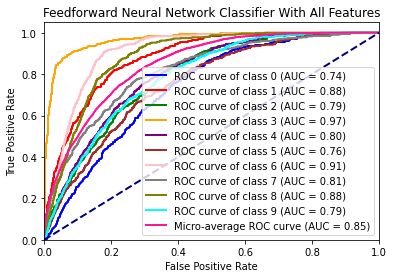

Feedforward Neural Network Classifier Accuracy = 36.620%
Feedforward Neural Network Classifier Micro-average AUC = 0.84776


In [156]:
mlpc_acc = accuracy_score(y_test, mlpc_pred)
mlpc_probs = mlpc.predict_proba(X_test_final)

eval_class_roc_acc(mlpc_probs, mlpc_acc, "Feedforward Neural Network")

# Model Evaluation

In [181]:
def model_eval(pred, classifier):
    cm = confusion_matrix(y_test, pred)

    class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

    fig, ax = plt.subplots(figsize=(10, 10))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    title = 'Confusion Matrix For ' + classifier + ' Classifier'
    ax.set_title(title)

    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)

    plt.show()
    
    unique_values, value_counts = np.unique(pred, return_counts=True)
    
    print("Predicted Values")
    for value, count in zip(unique_values, value_counts):
        print(f"{value}: {count}")

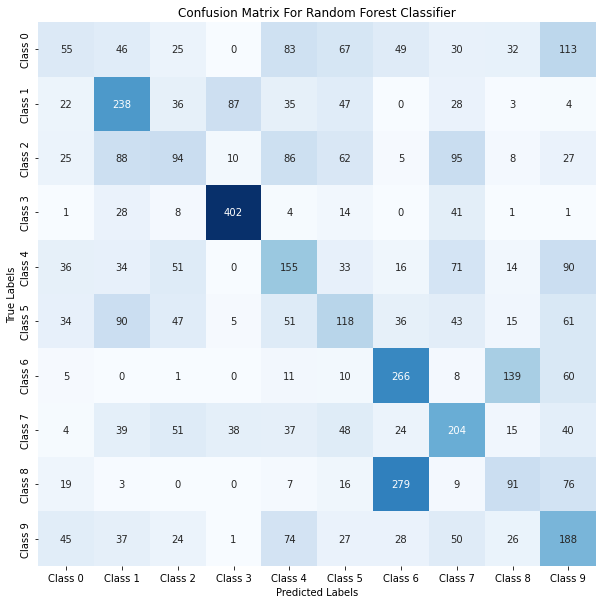

Predicted Values
0: 246
1: 603
2: 337
3: 543
4: 543
5: 442
6: 703
7: 579
8: 344
9: 660


In [182]:
model_eval(rfc_pred, 'Random Forest')

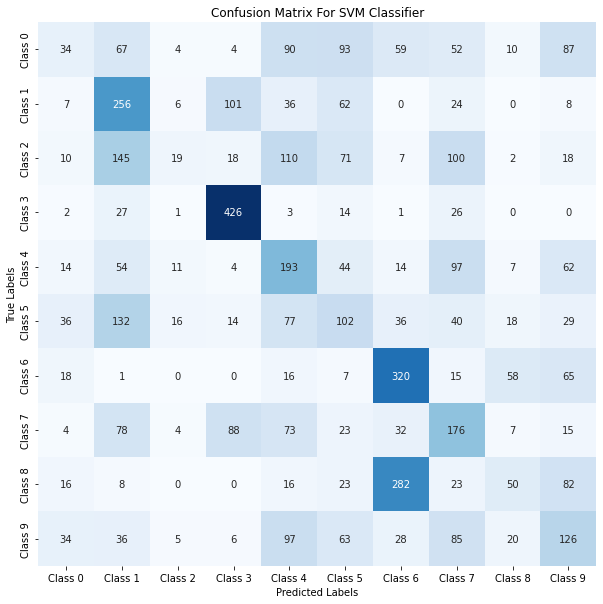

Predicted Values
0: 175
1: 804
2: 66
3: 661
4: 711
5: 502
6: 779
7: 638
8: 172
9: 492


In [183]:
model_eval(svm_pred, 'SVM')

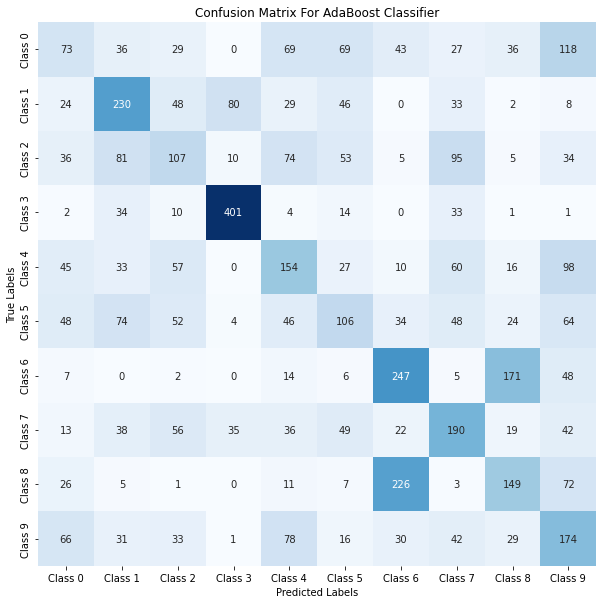

Predicted Values
0: 340
1: 562
2: 395
3: 531
4: 515
5: 393
6: 617
7: 536
8: 452
9: 659


In [184]:
model_eval(abc_pred, 'AdaBoost')

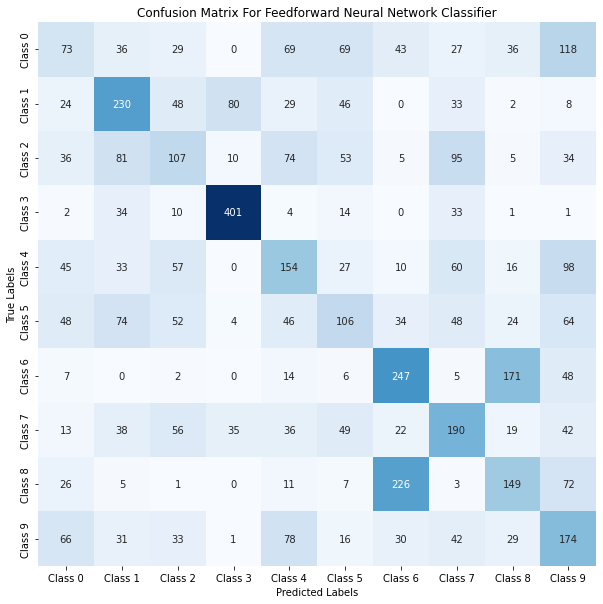

Predicted Values
0: 340
1: 562
2: 395
3: 531
4: 515
5: 393
6: 617
7: 536
8: 452
9: 659


In [185]:
model_eval(mlpc_pred, 'Feedforward Neural Network')